In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

In [10]:
Data = "ABC Company.xlsx - Sheet1.csv"

def load_dataset(Data):
    if Data.lower().endswith(".csv"):
        return pd.read_csv(Data)
    elif Data.lower().endswith(".xlsx") or Data.lower().endswith(".xls"):
        return pd.read_excel(Data)
    else:
        raise ValueError("Unsupported file format. Use .csv or .xlsx")

DataFlow = load_dataset(Data)
print("Rows, Columns:", DataFlow.shape)
DataFlow


Rows, Columns: (458, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [11]:
DFC = DataFlow.copy()
DFC

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [23]:
np.random.seed(42)

if 'height' not in DFC.columns:
    DFC['height'] = np.nan
DFC['height'] = np.random.randint(150,181, size=len(DFC))

assert DFC['height'].between(150,181).all()

DFC[['height']]

                    

,height
0,156
1,169
2,178
3,164
4,160
...,...
453,168
454,153
455,152
456,166


In [33]:
TeamsColumn = 'Team'
if TeamsColumn not in DFC.columns:
    raise KeyError(f"{TeamsColumn} not found in this DataFrame ")

TeamCounts = DFC[TeamsColumn].value_counts(dropna=False)
TeamPrcg = (TeamCounts/len(DFC) *100).round(2)
Dist_Team = pd.DataFrame({'count': TeamCounts, 'percentage' : TeamPrcg })
display(Dist_Team)

,count,percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
Milwaukee Bucks,16,3.49
New York Knicks,16,3.49
Boston Celtics,15,3.28
Los Angeles Clippers,15,3.28
Los Angeles Lakers,15,3.28
Phoenix Suns,15,3.28


**Data Insights**
- Dataset contains players from all teams with fairly equal distribution.
- Most Teams have standard 15 player roster.
- Few teams have a slightly larger rosters

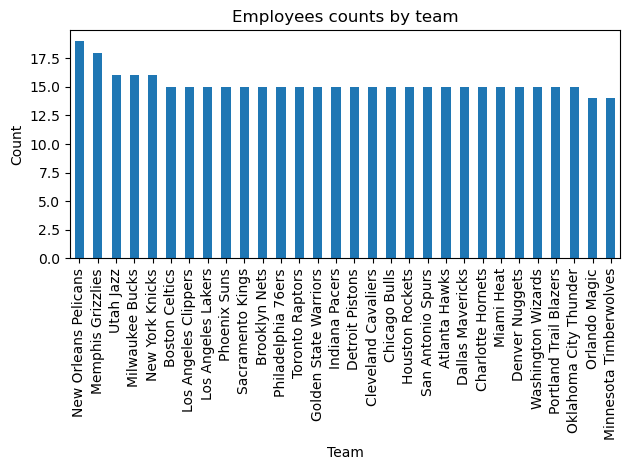

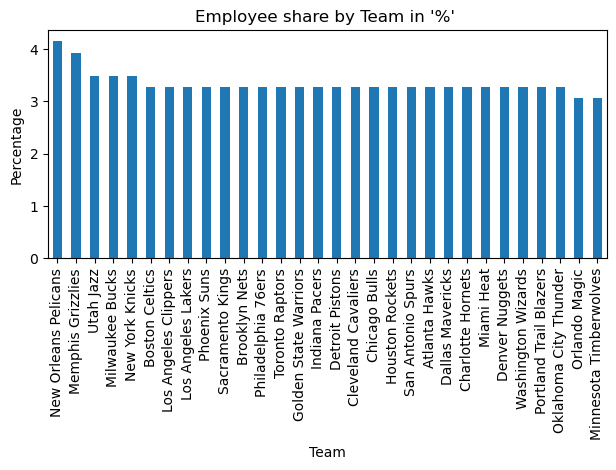

In [39]:
#DFC.columns.tolist()
ax = Dist_Team['count'].plot(kind='bar');
ax.set_title("Employees counts by team")
ax.set_xlabel("Team")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show();
ax = Dist_Team['percentage'].plot(kind='bar');
ax.set_title("Employee share by Team in '%' ")
ax.set_xlabel("Team")
ax.set_ylabel("Percentage")
plt.tight_layout()
plt.show();


In [41]:
PositionColumn = 'Position'
if PositionColumn not in DFC.columns:
    raise KeyError(f"{PositionColumn} not found in this DataFrame ")
PositionCounts = DFC[PositionColumn].value_counts(dropna=False)
display(PositionCounts.to_frame('count'))

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


**Data Insights**
- Players distributed across all main positions.
- Shooting Guards(SG) are the most common with 102 players.
- Centers are the least reprsented team with 79 players.



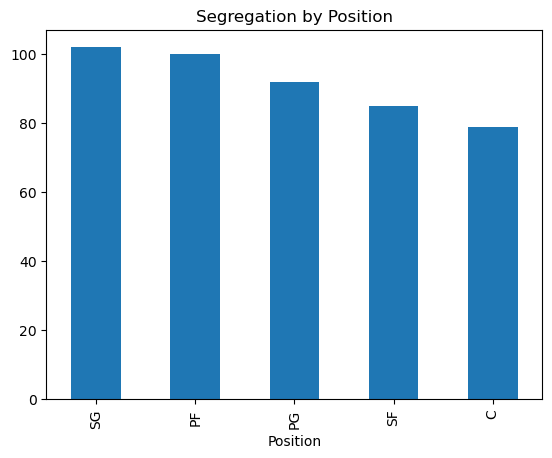

In [45]:
plt.figure()
PositionCounts.plot(kind='bar')
plt.title("Segregation by Position");

In [47]:
AgeColumn = 'Age'
if AgeColumn not in DFC.columns:
    raise KeyError(f"{AgeColumn}not found in this DataFrame")

Bins = [0, 20, 25, 30, 35, 40, 45, 50, 60, 200]
Labels = ["<20","20-24","25-29","30-34","35-39","40-44","45-49","50-59","60+"]

Age_Groups = pd.cut(DFC[AgeColumn].astype(float), bins = Bins, labels = Labels, right = True, include_lowest = True)

Age_Group_Counts= Age_Groups.value_counts().sort_index()
Predominant = Age_Group_Counts.idxmax()
print("Predominant Age Group ", Predominant)
Age_Group_Counts.to_frame('count')

Predominant Age Group  20-24


,count
Age,
<20,21
20-24,179
25-29,167
30-34,68
35-39,23
40-44,0
45-49,0
50-59,0
60+,0


**Data Insights**
- The predominant age is 20-24 years with 179 players, which is the majority.
- Together, the 20-29 age range accounts for 346 players, making up nearly 76% of all players.
- Players pool is heavily dominated by players in their early 20's with fewer veterans staying beyond 30-35 years.

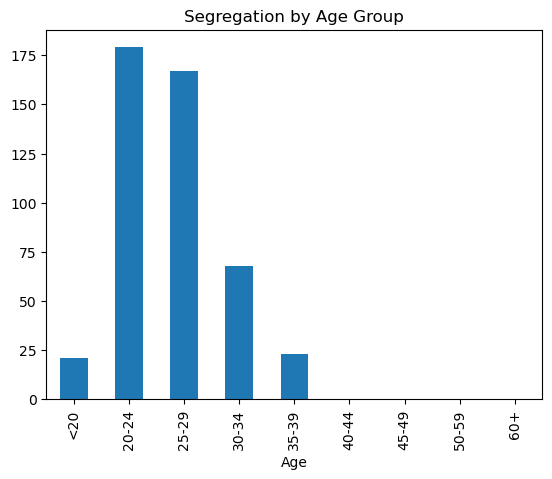

In [48]:
plt.figure()
Age_Group_Counts.plot(kind='bar')
plt.title("Segregation by Age Group");

In [50]:
SalaryColumn = 'Salary'
if SalaryColumn not in DFC.columns:
    raise KeyError(f"{SalaryColumn} not found in this DataFrame ")

SalaryRate = DFC.groupby([TeamsColumn, PositionColumn])[SalaryColumn].sum().sort_values(ascending=False)
SalaryRate.to_frame("Total Salary ")

Total Salary 
Team               Position               
Los Angeles Lakers SF           31866445.0
Miami Heat         PF           31538671.0
Houston Rockets    SG           28122883.0
Phoenix Suns       PG           28002998.0
Denver Nuggets     SF           27982771.0
...                                    ...
                   SG            2790245.0
Philadelphia 76ers SF            1845059.0
Sacramento Kings   PF            1370152.0
Miami Heat         C              981348.0
Orlando Magic      SF             845059.0

[149 rows x 1 columns]

**Data Insights**
- The Los Angeles Lakers and Miami Heat show the highest salary expenditure, making them the top spenders in this dataset
- Teams like Houston Rockets, Phoenix Suns and Denver Nuggets follow closely behind with expenditure around $28-29M.
- Even though most teams have similar roster sizes, their salary investments vary widely, showing how some teams invest heavily in star power while others distribute salaries more evenly. 

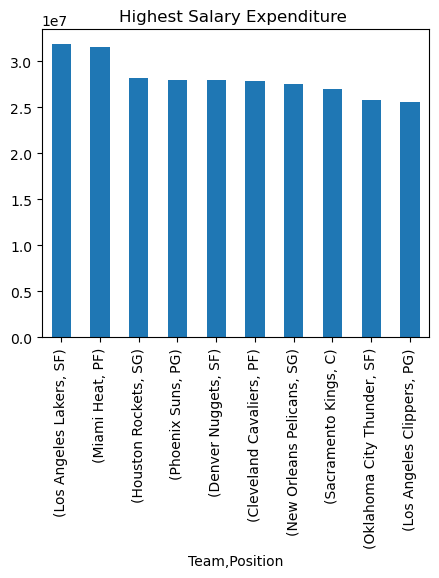

In [53]:
Top = SalaryRate.head(10)
plt.figure(figsize=(5,4))
Top.plot(kind='bar')
plt.title("Highest Salary Expenditure ");

In [57]:
Sub = DFC[[AgeColumn, SalaryColumn]].dropna().astype(float)
Corr = Sub[AgeColumn].corr(Sub[SalaryColumn])

print(f"Correlation between Age and Salary is : {Corr:.3f}")

Correlation between Age and Salary is : 0.214


**Data Insights**
- The correlation coefficient shows a weak positive correlation, As age increases salary tends to increase slightly, but the relationship is not stronger.
- Players in their mid-to-late 20s earn the highest salaries, while very young players and older veterans earn comparatively less unless they are exceptional players.

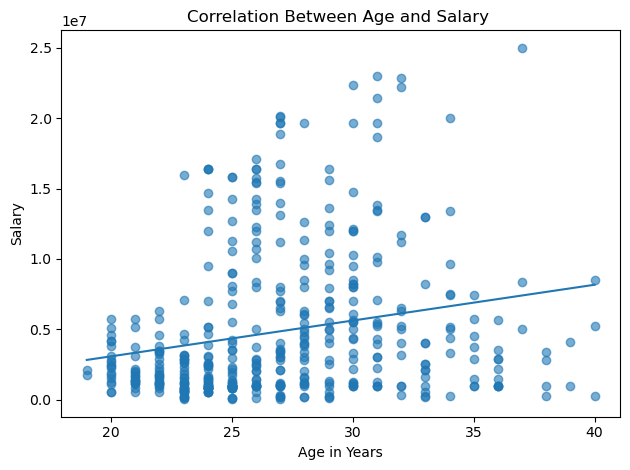

In [61]:
x = Sub[AgeColumn].values
y = Sub[SalaryColumn].values
plt.figure()
plt.scatter(x,y, alpha=0.6)
m,b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

plt.plot(x_line, y_line)
plt.xlabel("Age in Years")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary ")
plt.tight_layout();